In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import arange
from pandas import read_table, set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV


Matplotlib is building the font cache; this may take a moment.


### Data Cleaning

In [2]:
df = pd.read_excel('ebayAuctions.xlsx',sheet_name='eBay auctions')

In [3]:
df.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [4]:
df.shape

(1972, 8)

In [35]:
# 'Competitive?' is actually a binary predictor, so converting from numeric to catergorial here
df['Competitive?'] = df['Competitive?'].astype('category')

In [31]:
df['Category'].value_counts()

Category
Music/Movie/Game        403
Collectibles            239
Toys/Hobbies            234
Automotive              178
Antique/Art/Craft       177
SportingGoods           124
Clothing/Accessories    119
Home/Garden             102
Jewelry                  82
Health/Beauty            64
Electronics              55
Books                    54
Coins/Stamps             37
Computer                 36
Pottery/Glass            20
Business/Industrial      18
EverythingElse           17
Photography              13
Name: count, dtype: int64

In [32]:
# extract all categories and store in a list
category_list = df['Category'].unique().tolist()

In [33]:
# Create dummy variables for each category
for category in category_list:
    df[category] = df['Category'] == category


### Exploratory Data Analysis

In [13]:
df.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?,Music/Movie/Game,Automotive,...,Electronics,Computer,EverythingElse,Clothing/Accessories,Coins/Stamps,Antique/Art/Craft,Jewelry,Pottery/Glass,Health/Beauty,Photography
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              1972 non-null   object 
 1   Currency              1972 non-null   object 
 2   sellerRating          1972 non-null   int64  
 3   Duration              1972 non-null   int64  
 4   endDay                1972 non-null   object 
 5   ClosePrice            1972 non-null   float64
 6   OpenPrice             1972 non-null   float64
 7   Competitive?          1972 non-null   int64  
 8   Music/Movie/Game      1972 non-null   bool   
 9   Automotive            1972 non-null   bool   
 10  SportingGoods         1972 non-null   bool   
 11  Home/Garden           1972 non-null   bool   
 12  Books                 1972 non-null   bool   
 13  Collectibles          1972 non-null   bool   
 14  Business/Industrial   1972 non-null   bool   
 15  Toys/Hobbies         

In [9]:
df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [11]:
df.isnull().sum()

Category                0
Currency                0
sellerRating            0
Duration                0
endDay                  0
ClosePrice              0
OpenPrice               0
Competitive?            0
Music/Movie/Game        0
Automotive              0
SportingGoods           0
Home/Garden             0
Books                   0
Collectibles            0
Business/Industrial     0
Toys/Hobbies            0
Electronics             0
Computer                0
EverythingElse          0
Clothing/Accessories    0
Coins/Stamps            0
Antique/Art/Craft       0
Jewelry                 0
Pottery/Glass           0
Health/Beauty           0
Photography             0
dtype: int64

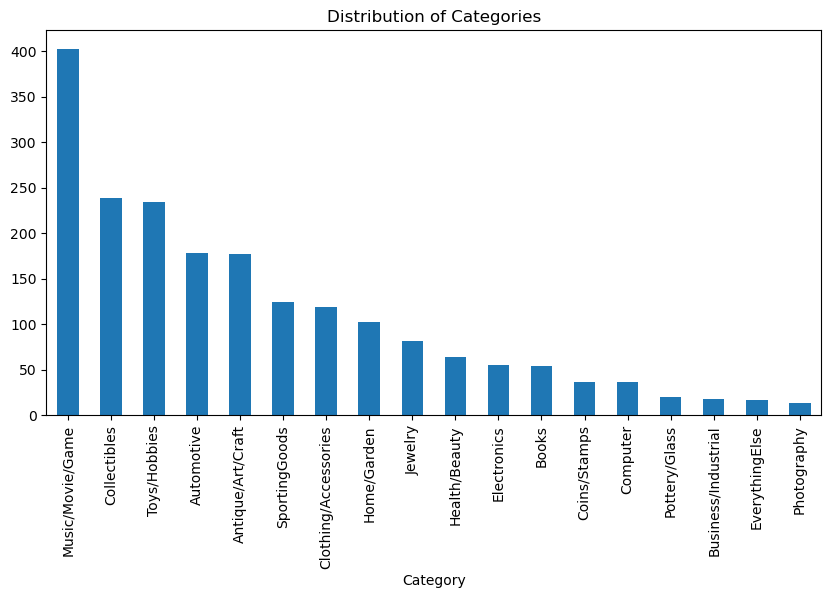

In [38]:
df['Category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Categories")
plt.show()

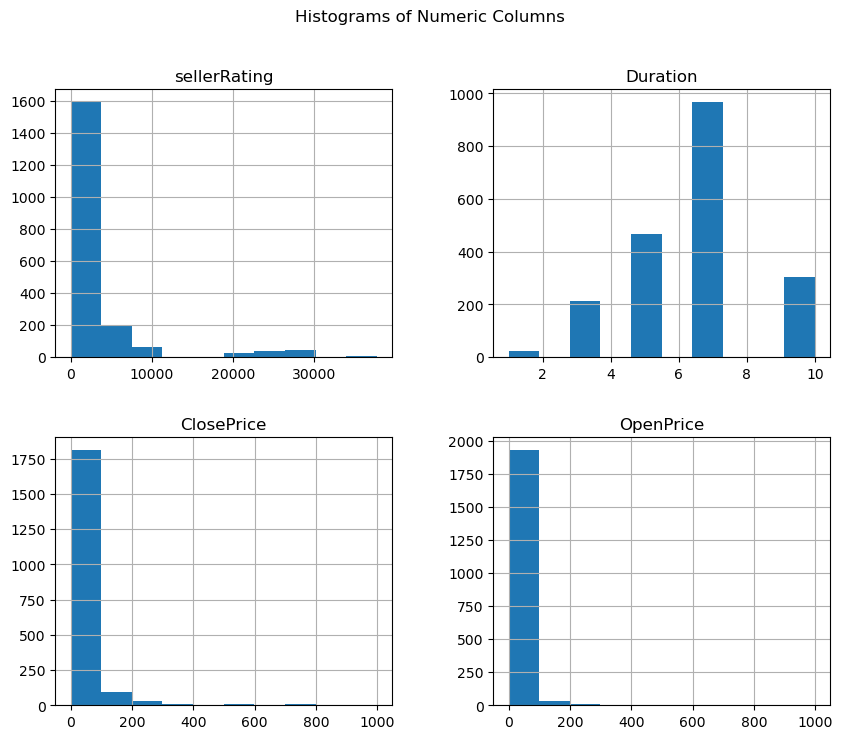

In [39]:
df.hist(figsize=(10,8))
plt.suptitle("Histograms of Numeric Columns", fontsize=12)
plt.show()

In [55]:
num_cols = ['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice']

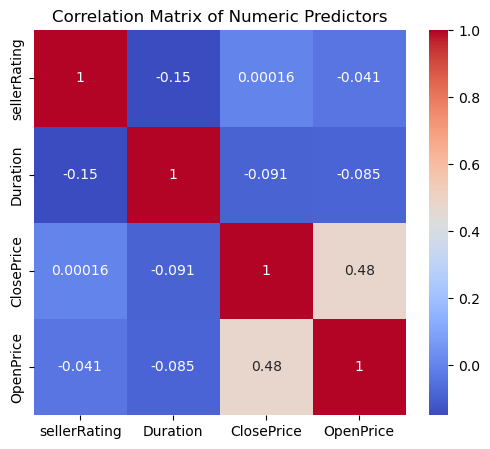

In [58]:
corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Predictors")
plt.show()

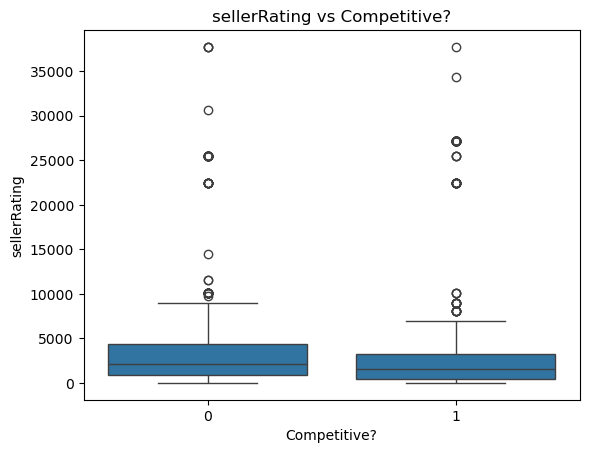

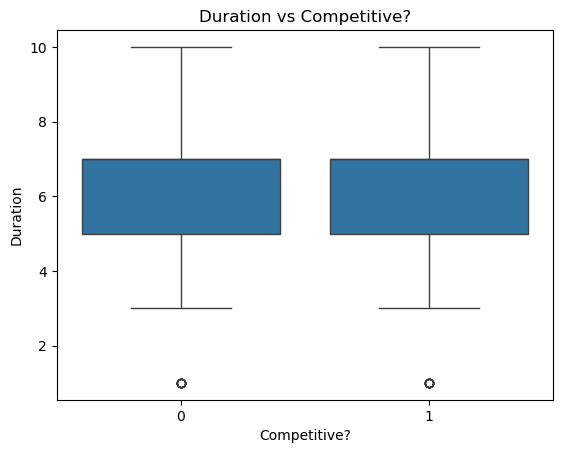

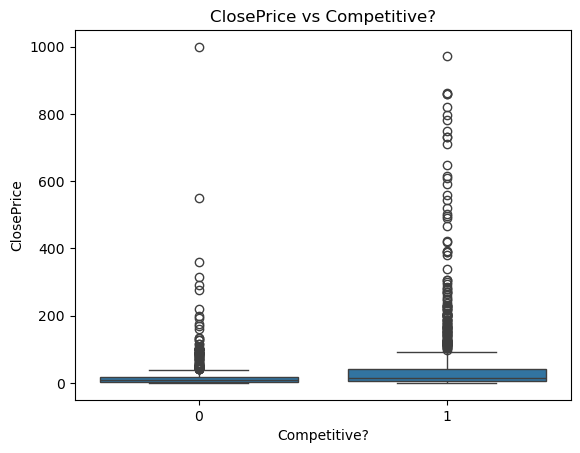

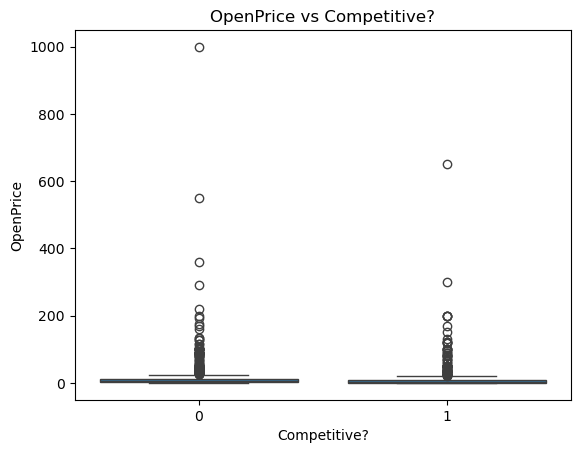

In [54]:
for col in num_cols:
    sns.boxplot(x='Competitive?', y=col, data=df)
    plt.title(f"{col} vs Competitive?")
    plt.show()

In [56]:
pd.crosstab(df['Category'], df['Competitive?'])

Competitive?,0,1
Category,,
Antique/Art/Craft,77,100
Automotive,115,63
Books,27,27
Business/Industrial,6,12
Clothing/Accessories,59,60
Coins/Stamps,26,11
Collectibles,101,138
Computer,12,24
Electronics,11,44
